# Missing Values
There are really 3 types of missing values
1) really missed to fill (Missing Completly at random ) embarked/deck is the example we cannot collect the deck
2)  skipped wantedly some examples (Missing  at random ) can be age or salary etc not directly dependent on same fied for example female wont share age men wont share salay
3)  skipped wantedly (not random) user might not fill salary if the sal is too high or too low

In [69]:
import seaborn as sns

df = sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Check the missing values

In [3]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insights
1) so many data has age missing we will see more details  how missed
2) deck is almost null and we cant do anything with the value from the 891 recs so we can ignore it
3) embark_town only two values is missinh

In [10]:
df[df["deck"].notnull()]["deck"].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [12]:
# we cant get anything from this data as it is less we cannot find or assume decks we can either do random or delete this since missing data is too large deleting this
df.drop(["deck"], axis=1, inplace=True)

### Now Age we will look


<Axes: xlabel='age', ylabel='Count'>

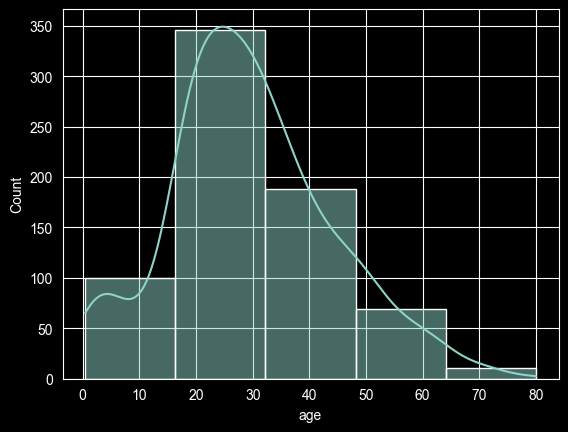

In [22]:
sns.histplot(df["age"],bins=5 ,kde=True)

In [23]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [34]:
df["age"].median()

np.float64(28.0)

In [35]:
# mean is 29 and pdf is not skwed to once side so we can use anything for the missing values

In [37]:
df["age"].fillna(df["age"].median(), inplace=True)

In [38]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [64]:
# now we have embart and embark town we will try to fix both both are related and seeing data we found 2 peoples data is missing either we can delete these rows or put max occurance
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)


In [66]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### This is one example of we filling null's

So we must understand the data and think why can it be missed before we fill and we must fill missing data with some approches based on reason